# SHAP (SHapley Additive exPlanations)
#### Using SHAP to see feature contribution to the target 
Works with any tree based model
Library documentation: https://github.com/slundberg/shap#citations

In [123]:
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

### Load data into dataframe

In [117]:
# lists what we can extract from the sklearn toy dataset
dir(boston) 

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [118]:
boston = load_boston()

# Create a Pandas dataframe with all the features
X = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = boston['target']

### Linear Regression and Random Forest 

In [86]:
# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [102]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(Xtrain, ytrain)

In [114]:
rf_train = rf_reg.score(Xtrain, ytrain)
rf_cv = cross_val_score(rf_reg, Xtrain, ytrain, cv=5).mean()
rf_test = rf_reg.score(Xtest, ytest)
print('Evaluation the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation the Random Forest performance

Training score: 0.9831
Cross validation score: 0.8924
Test score: 0.8438


### SHAP values

In [116]:
# Initialize JavaScript visualization
shap.initjs()

In [145]:
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X)

In [150]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [151]:
shap.force_plot(explainer.expected_value, shap_values, X)

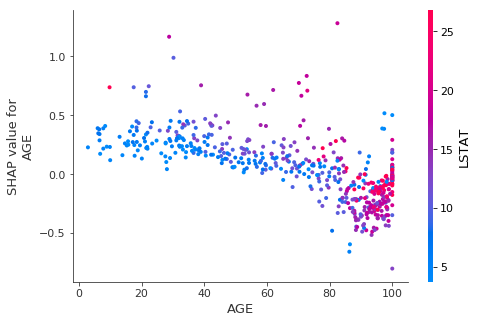

In [153]:
# Effect of a single feature on the shap value
shap.dependence_plot('AGE', shap_values, X)

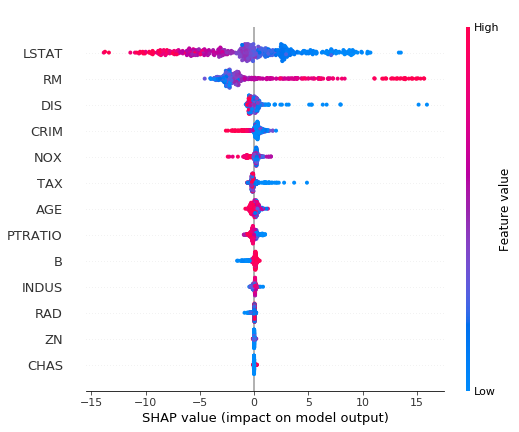

In [148]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X)

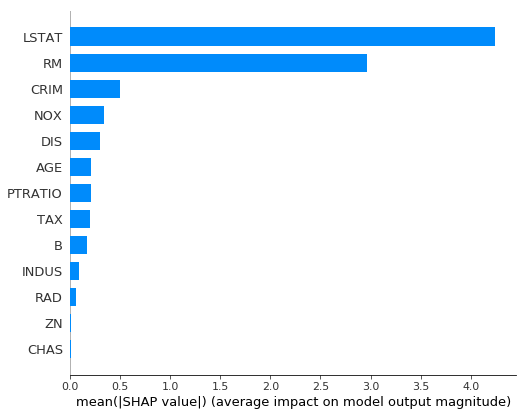

In [143]:
shap.summary_plot(shap_values, Xtest, plot_type="bar")

In [136]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu